<h1 style='color: green; font-size: 36px; font-weight: bold;'>Analysis for health and medicine</h1>

# <font color='red' style='font-size: 30px;'>1.2 Known the Dataset</font>
<hr style='border: 2px solid red;'>

## Importing pandas

In [130]:
import pandas as pd

## About dataset
<hr>

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Our world was surprised for by a deadly disease. Since 2020 all people are taking care of themselves and fighting the disease.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Our dataset is about the covid 19 cases in the world.</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Province/State</b> - Province in the country - filled in the China</li>
    <li><b>Country/Region</b> - Country about the cases</li>
    <li><b>`Days`</b> - All days of the pandemic are registered - 1/22/20 at yesterday</li>
</ul>

### Reading data

In [131]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [132]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,189343,189477,189710,190010,190254,190435,190643,191040,191247,191585
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,322125,322837,323282,323829,325241,325736,326077,326181,326787,327232
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269269,269381,269473,269556,269650,269731,269805,269894,269971,270043
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45899,45899,45975,45975,45975,45975,45975,45975,45975,46027
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [133]:
confirmed_by_country_cumulative = confirmed.groupby("Country/Region").sum()

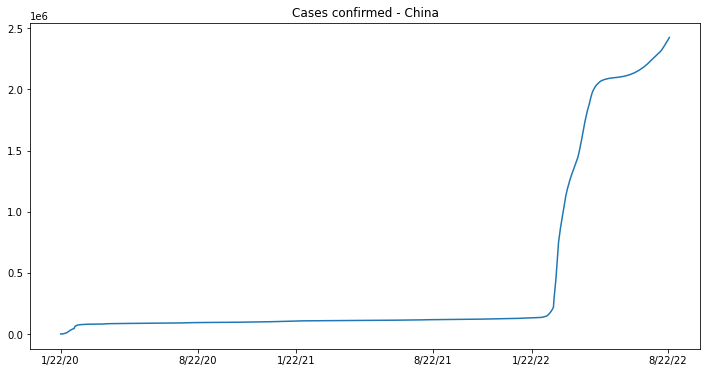

In [134]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

ax.plot(confirmed_by_country_cumulative.loc['China'][2:]);

ax.set_title('Cases confirmed - China')

ax.set_xticks(['1/22/20', '8/22/20', '1/22/21','8/22/21','1/22/22', '8/22/22']);

# <font color='red' style='font-size: 30px;'>1.3 Cases in China</font>
<hr style='border: 2px solid red;'>

In [135]:
confirmed_in_china = confirmed_by_country_cumulative.loc['China'][2:].diff().dropna()
confirmed_in_china

1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
            ...   
8/20/22     8517.0
8/21/22     6885.0
8/22/22    10064.0
8/23/22     8505.0
8/24/22     9418.0
Name: China, Length: 945, dtype: float64

## Changing dataframe

In [136]:
confirmed_in_china = pd.DataFrame(
    confirmed_in_china, 
)
confirmed_in_china.reset_index(inplace= True)
confirmed_in_china.columns =  ['Date', 'Cases']

In [137]:
confirmed_in_china['Date'] = pd.to_datetime(confirmed_in_china['Date'])

## Grapfhic - Cases confirmed in China

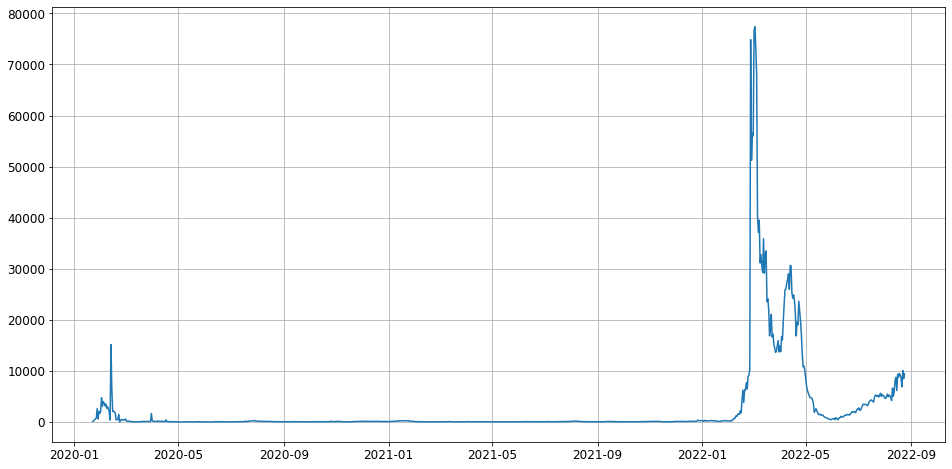

In [138]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (16, 8))

ax.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'])

ax.tick_params(labelsize = 12)
ax.grid(True)

In [139]:
from datetime import datetime, date, timedelta

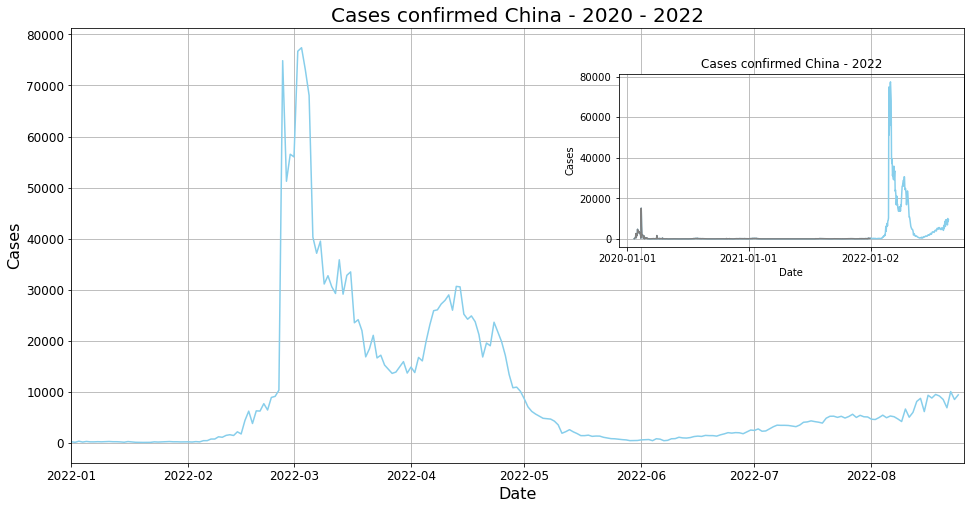

In [140]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (16, 8))
ax2 = fig.add_axes([0.6, 0.5, 0.3, 0.3])


ax.set_xlim(datetime(2022, 1, 1), datetime.now())
ax.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'], color = 'skyblue')
ax.set_title('Cases confirmed China - 2020 - 2022', fontsize = 20)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)
ax.tick_params(labelsize = 12)
ax.grid(True)


gray_right = confirmed_in_china['Date'] < datetime(2022, 1, 1)
ax2.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'], color = 'skyblue')
ax2.plot(confirmed_in_china[gray_right]['Date'], confirmed_in_china[gray_right]['Cases'], color = 'gray')
ax2.set_title('Cases confirmed China - 2022', fontsize = 12)
ax2.set_xlabel('Date', fontsize = 10)
ax2.set_ylabel('Cases', fontsize = 10)
ax2.grid(True)
ax2.set_xticks(
    [date(2020, 1, 1) + timedelta(i * 366) for i in range(3)] 
);

# <font color='red' style='font-size: 30px;'>1.4 Cases in South America - Yesterday</font>
<hr style='border: 2px solid red;'>

In [141]:
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

confirmed_in_south_america_yesterday = confirmed_by_country_cumulative.loc[south_america]
confirmed_in_south_america_yesterday = confirmed_in_south_america_yesterday.iloc[:, 2:].diff(axis = 1).dropna(axis = 1)
confirmed_in_south_america_yesterday = confirmed_in_south_america_yesterday.iloc[:, -1]


confirmed_in_south_america_yesterday = pd.DataFrame(confirmed_in_south_america_yesterday)
confirmed_in_south_america_yesterday.reset_index(inplace = True)
confirmed_in_south_america_yesterday.columns = ['Country', 'Cases_yesterday']
confirmed_in_south_america_yesterday


,Country,Cases_yesterday
0,Argentina,0
1,Bolivia,0
2,Brazil,44736
3,Chile,8312
4,Colombia,0
5,Ecuador,2433
6,Guyana,0
7,Paraguay,0
8,Peru,5486
9,Suriname,0


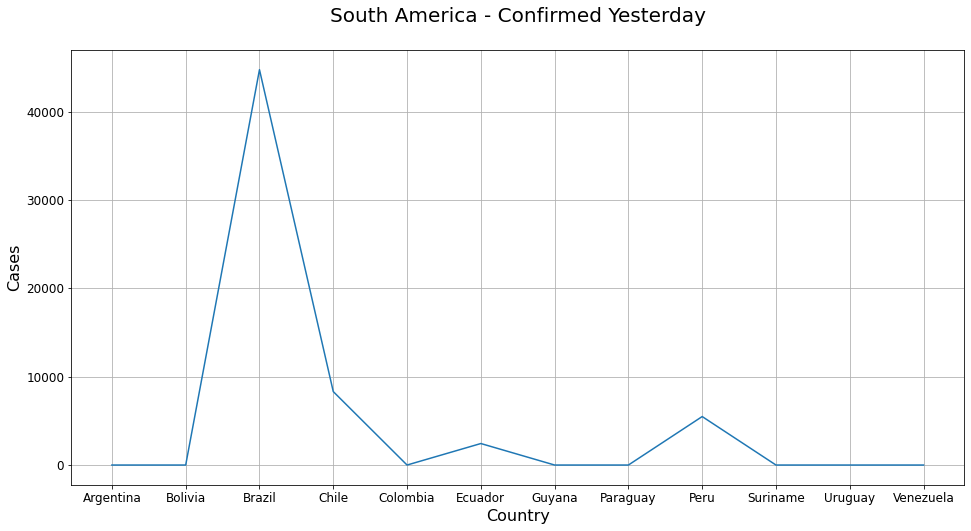

In [142]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

ax.plot(confirmed_in_south_america_yesterday['Country'], confirmed_in_south_america_yesterday['Cases_yesterday'])
ax.set_title(f'South America - Confirmed Yesterday', fontsize = 20, y = 1.05)
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)

ax.tick_params(labelsize = 12)
ax.grid(True)

## Comparing categories

Text(Argentina, 5110.583333333333, 'Average')

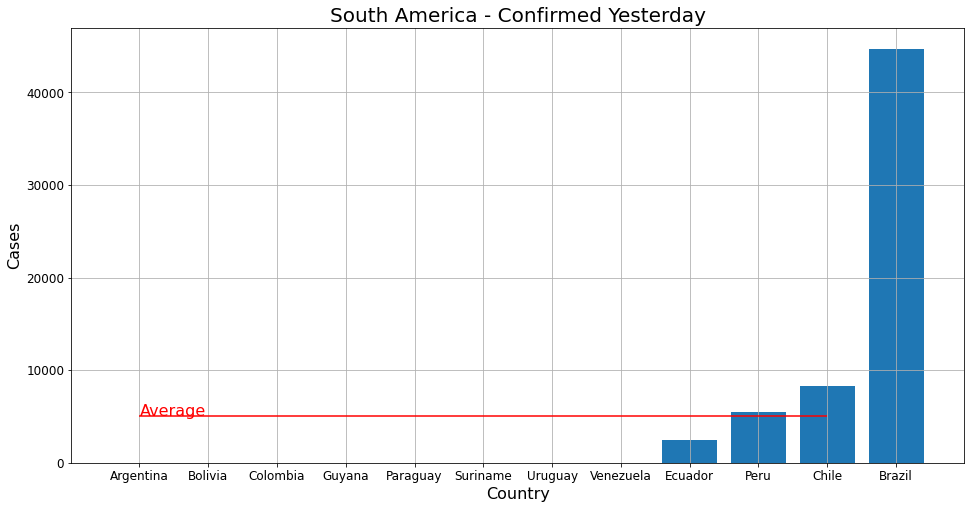

In [143]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))


ax.bar(
    data = confirmed_in_south_america_yesterday.sort_values(by = 'Cases_yesterday', ascending = True), 
    x = 'Country',
    height = 'Cases_yesterday'
)
ax.set_title(f'South America - Confirmed Yesterday', fontsize = 20)
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)

ax.grid(True)
ax.tick_params(labelsize = 12)
average = confirmed_in_south_america_yesterday['Cases_yesterday'].mean()
ax.hlines(
    y = average,
    xmin = 'Argentina', 
    xmax = 'Chile',
    color = 'r'
)
ax.annotate('Average', xy = ('Argentina', average + 30), fontsize = 16, color = 'r')

# <font color='red' style='font-size: 30px;'>1.5 Working with recovered and deaths</font>
<hr style='border: 2px solid red;'>

In [159]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')    

In [256]:
def latest_day_by_country(data):
    # Taking cases from the day before yesterday
    # United Kingdom - There is a problem in 08/24/2022
    return data.groupby('Country/Region').sum().iloc[:, 2:].diff(axis = 1).iloc[:, -2].dropna()

In [257]:
informations_covid_by_country = [
    latest_day_by_country(confirmed),
    latest_day_by_country(recovered),
    latest_day_by_country(deaths)
]
combined = pd.concat(informations_covid_by_country, axis = 1)

combined.columns = ['Confirmed', 'Recovered', 'Deaths']
combined

,Confirmed,Recovered,Deaths
Country/Region,,,
Afghanistan,207,0,1
Albania,606,0,1
Algeria,77,0,0
Andorra,0,0,0
Angola,0,0,0
...,...,...,...
West Bank and Gaza,0,0,0
Winter Olympics 2022,0,0,0
Yemen,2,0,0


## Fatality Rate

In [258]:
sum_up = combined.sum()
sum_up

Confirmed    895088
Recovered         0
Deaths         2799
dtype: int64

In [259]:
print((sum_up['Deaths'] / sum_up['Confirmed']* 100).round(2),   "%")

0.31 %
